# Density planar tutorial

To follow this tutorial, the data test files `airwater` of MAICoS are needed.
You can obtain it by cloning MAICoS repository:

```
    git clone git@gitlab.com:maicos-devel/maicos.git
    
```
The `airwater` data files are located in `tests/data/airwater/`. 
First, let us ignore unnecessary warnings:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

First, import MAICoS, NumPy, MDAnalysis, and PyPlot:

In [ ]:
import maicos
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

and set a few parameters for plotting purpose:

In [ ]:
fontsize = 25
font = {'family': 'sans', 'color':  'black', 
        'weight': 'normal', 'size': fontsize}
my_color_1 = np.array([0.090, 0.247, 0.560])
my_color_2 = np.array([0.235, 0.682, 0.639])
my_color_3 = np.array([1.000, 0.509, 0.333])
my_color_4 = np.array([0.588, 0.588, 0.588])

Define the path to the ``airwater`` data folder of MAICoS:

In [ ]:
datapath = "../../../../tests/data/airwater/"

The `airwater` system consists of a 2D slab with 352 water molecules in vacuum,
where the two water/vacuum interfaces are normal to 
the axis $z$:

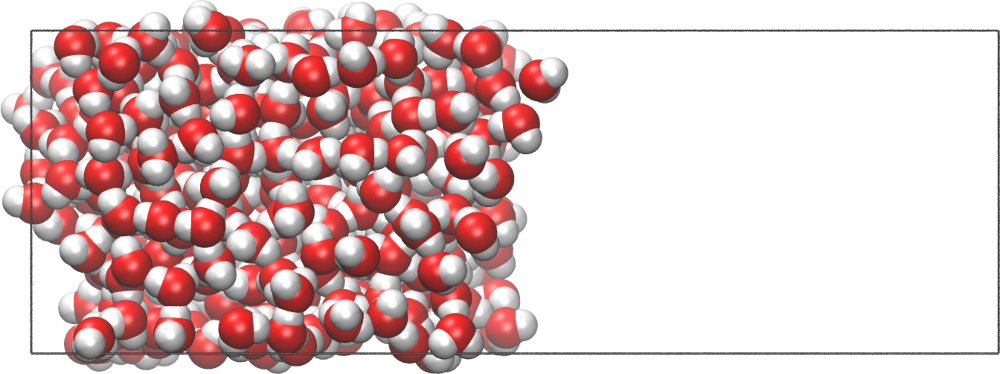

Create a universe using MDAnalysis and define a group containing
the oxygen and the hydrogen atoms of the water molecules,
as well as a group containing only the oxygen atoms, and 
a group containing only the hydrogen atoms:

In [ ]:
u = mda.Universe(datapath+'conf.gro', 
                 datapath+'traj.trr')
group_H2O = u.select_atoms('type O or type H')
group_O = u.select_atoms('type O')
group_H = u.select_atoms('type H')

Let us print a few information about the trajectory file:

In [ ]:
print(f"The number of water molecules is {group_O.n_atoms}")
timestep = np.round(u.trajectory.dt,2)
print(f"The time interval between the frames is {timestep} ps")
total_time = np.round(u.trajectory.totaltime,2)
print(f"The total simulation time is {total_time} ps")

Let us use the ``DensityPlanar`` class of MAICos using
the `group_H2O` group:

In [ ]:
dplan = maicos.DensityPlanar(group_H2O)
dplan.run()

Extract the coordinate and the density profile from the ``results`` attribute:

In [ ]:
zcoor = dplan.results.z
dens = dplan.results.profile_mean

By default the binwidth is 1 Å, the unit is $\text{amu}/\text{Å}^3$,
and the axis is $z$. Plot the density profile using :

In [ ]:
fig = plt.figure(figsize=(13,6.5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel("z coordinate (Å)", fontdict=font)
plt.ylabel(r"density H2O (kg/m$^3$]", fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1.plot(zcoor, dens, color=my_color_1, linewidth=4)
ax1.yaxis.offsetText.set_fontsize(20)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.yaxis.offsetText.set_fontsize(30)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)
ax1.tick_params(axis='x', pad=10)
plt.show()

If `verbose=True` is used, a progress bar will be displayed:

In [ ]:
dplan = maicos.DensityPlanar(group_H2O)
dplan.run(verbose=True)

To analyse only a subpart of a trajectory file, use the `start`, `stop`, and `step` keywords:

In [ ]:
dplan = maicos.DensityPlanar(group_H2O)
dplan.run(verbose=True, start = 10, stop = 20, step = 2)

For each module, they are several other options you can play with. To know the full
list of options, have a look at the ``Inputs`` section in the documentation.
For instance, you can increase the spacial resolution
by reducing the binwidth:

In [ ]:
dplan_smaller_bin = maicos.DensityPlanar(group_H2O, binwidth = 0.5)
dplan_smaller_bin.run()
zcoor_smaller_bin = dplan_smaller_bin.results.z
dens_smaller_bin = dplan_smaller_bin.results.profile_mean

In [ ]:
fig = plt.figure(figsize=(13,6.5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel(r"$z$ coordinate (Å)", fontdict=font)
plt.ylabel(r"density H2O (kg/m$^3$]", fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1.plot(zcoor_smaller_bin, dens_smaller_bin, color=my_color_2, linewidth=4)
ax1.plot(zcoor, dens, color=my_color_1, linewidth=4)
ax1.yaxis.offsetText.set_fontsize(20)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.yaxis.offsetText.set_fontsize(30)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)
ax1.tick_params(axis='x', pad=10)
plt.show()

Note : less noisy profile can be obtained by running longer simulations.

MAICoS can deal with several groups at once:

In [ ]:
dplan_separate = maicos.DensityPlanar([group_O, group_H], binwidth = 0.5)
dplan_separate.run()

In this case, respective results for each group are returned:

In [ ]:
zcoor_separate = dplan_smaller_bin.results.z
dens_oxygen = dplan_separate.results.profile_mean.T[0]
dens_hygrogen = dplan_separate.results.profile_mean.T[1]

In [ ]:
fig = plt.figure(figsize=(13,6.5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel(r"$z$ coordinate (Å)", fontdict=font)
plt.ylabel(r"density H2O (kg/m$^3$]", fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1.plot(zcoor_separate, dens_hygrogen, color=my_color_4, linewidth=4)
ax1.plot(zcoor_separate, dens_oxygen, color=my_color_3, linewidth=4)
ax1.yaxis.offsetText.set_fontsize(20)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.yaxis.offsetText.set_fontsize(30)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)
ax1.tick_params(axis='x', pad=10)
plt.show()